In [1]:
from function_list import *

In [2]:
DIR_INPUT='./simulated-data-transformed/' 

BEGIN_DATE = "2018-04-01"
END_DATE = "2018-09-30"
print("Load  files")
%time transactions_df=read_from_files(DIR_INPUT, BEGIN_DATE, END_DATE)
print("{0} transactions loaded, containing {1} fraudulent transactions".format(len(transactions_df),transactions_df.TX_FRAUD.sum()))

Load  files
Wall time: 1.67 s
1754155 transactions loaded, containing 14681 fraudulent transactions


In [3]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX_7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2018-04-01 00:00:31,596,3156,57.16,31,0,0,0,1,...,1.0,57.16,1.0,57.16,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2018-04-01 00:02:10,4961,3412,81.51,130,0,0,0,1,...,1.0,81.51,1.0,81.51,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018-04-01 00:07:56,2,1365,146.00,476,0,0,0,1,...,1.0,146.00,1.0,146.00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2018-04-01 00:09:29,4128,8737,64.49,569,0,0,0,1,...,1.0,64.49,1.0,64.49,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018-04-01 00:10:34,927,9906,50.99,634,0,0,0,1,...,1.0,50.99,1.0,50.99,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
fraud = transactions_df[transactions_df['TX_FRAUD']==1]
normal = transactions_df[transactions_df['TX_FRAUD']==0]

In [5]:
print(fraud.shape, normal.shape)

(14681, 23) (1739474, 23)


In [6]:
fraud.TX_AMOUNT.describe()

count    14681.000000
mean       131.168024
std        154.485795
min          0.020000
25%         32.980000
50%         72.220000
75%        177.300000
max       2628.000000
Name: TX_AMOUNT, dtype: float64

In [7]:
normal.TX_AMOUNT.describe()

count    1.739474e+06
mean     5.297791e+01
std      3.942173e+01
min      0.000000e+00
25%      2.094000e+01
50%      4.449000e+01
75%      7.663000e+01
max      2.199800e+02
Name: TX_AMOUNT, dtype: float64

In [8]:
start_date_training = datetime.datetime.strptime("2018-05-01", "%Y-%m-%d")
delta_train = delta_delay = delta_test = 7
(train_df, test_df)=get_train_test_set(transactions_df,start_date_training,
                                       delta_train,delta_delay,delta_test)

In [9]:
train_df.shape

(67208, 23)

In [10]:
train_df[train_df.TX_FRAUD==1].shape

(637, 23)

In [11]:
test_df.shape

(58101, 23)

In [12]:
output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'CUSTOMER_ID_NB_TX_1DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW', 'CUSTOMER_ID_NB_TX_7DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW', 'CUSTOMER_ID_NB_TX_30DAY_WINDOW',
       'CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW']

In [13]:
# We first create a decision tree object. We will limit its depth to 2 for interpretability, 
# and set the random state to zero for reproducibility
classifier = sklearn.tree.DecisionTreeClassifier(max_depth = 2, random_state=0)

model_and_predictions_dictionary = fit_model_and_get_predictions(classifier, train_df, test_df, 
                                                                 input_features, output_feature,
                                                                 scale=False)

In [14]:
test_df['TX_FRAUD_PREDICTED']=model_and_predictions_dictionary['predictions_test']
test_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW,CUSTOMER_ID_NB_TX_30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_FRAUD_PREDICTED
422339,422339,2018-05-15 00:00:04,3307,3257,32.26,3801604,44,0,0,0,...,45.051250,29.0,40.320000,1.0,0.0,5.0,0.0,20.0,0.0,0.003568
422340,422340,2018-05-15 00:00:11,3983,7550,40.79,3801611,44,0,0,0,...,47.920000,15.0,35.238000,1.0,0.0,7.0,0.0,35.0,0.0,0.003568
422341,422341,2018-05-15 00:01:12,1093,5378,23.61,3801672,44,0,0,0,...,15.647500,78.0,14.157692,1.0,0.0,9.0,0.0,34.0,0.0,0.003568
422342,422342,2018-05-15 00:02:16,3989,3159,104.66,3801736,44,0,0,0,...,104.094000,25.0,84.169600,4.0,0.0,10.0,0.0,37.0,0.0,0.003568
422343,422343,2018-05-15 00:03:23,2737,5712,132.42,3801803,44,0,0,0,...,79.471818,111.0,76.982613,1.0,0.0,6.0,0.0,26.0,0.0,0.003568


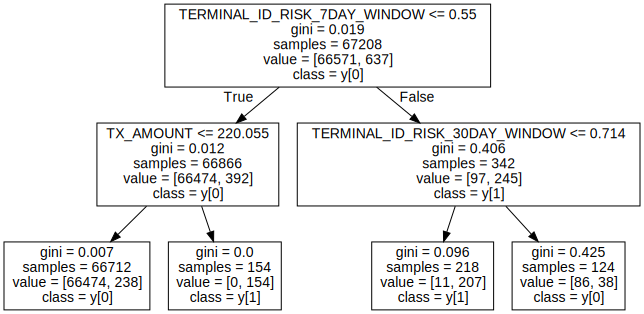

In [15]:
display(graphviz.Source(sklearn.tree.export_graphviz(classifier,feature_names=input_features,class_names=True, filled=False)))

In [16]:
predictions_df=test_df
predictions_df['predictions']=model_and_predictions_dictionary['predictions_test']
    
performance_assessment(predictions_df, top_k_list=[100])

,AUC ROC,Average precision,Card Precision@100
0,0.788,0.545,0.251


In [17]:
classifiers_dictionary={'Logistic regression':sklearn.linear_model.LogisticRegression(random_state=0), 
                        'Decision tree with depth of two':sklearn.tree.DecisionTreeClassifier(max_depth=2,random_state=0), 
                        'Decision tree - unlimited depth':sklearn.tree.DecisionTreeClassifier(random_state=0),
                        'Random forest':sklearn.ensemble.RandomForestClassifier(random_state=0,n_jobs=-1),
                        'XGBoost':xgboost.XGBClassifier(random_state=0,n_jobs=-1),
                       }

fitted_models_and_predictions_dictionary={}

for classifier_name in classifiers_dictionary:
    
    model_and_predictions = fit_model_and_get_predictions(classifiers_dictionary[classifier_name], train_df, test_df, 
                                                                                  input_features=input_features,
                                                                                output_feature=output_feature)
    fitted_models_and_predictions_dictionary[classifier_name]=model_and_predictions

[11:21:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
# performances on test set
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary, test_df,
                                                        type_set='test', 
                                                        top_k_list=[100])

cm = sns.light_palette('green', as_cmap=True)
s = df_performances.style.background_gradient(cmap=cm)
s

,AUC ROC,Average precision,Card Precision@100
Logistic regression,0.865000,0.586000,0.286000
Decision tree with depth of two,0.788000,0.545000,0.251000
Decision tree - unlimited depth,0.810000,0.340000,0.266000
Random forest,0.865000,0.652000,0.286000
XGBoost,0.857000,0.663000,0.276000


In [19]:
# performances on test set
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary, test_df, 
                                                        type_set='test', 
                                                        top_k_list=[100])

cm = sns.light_palette('green', as_cmap=True)
s = df_performances.style.background_gradient(cmap=cm)
s

,AUC ROC,Average precision,Card Precision@100
Logistic regression,0.865000,0.586000,0.286000
Decision tree with depth of two,0.788000,0.545000,0.251000
Decision tree - unlimited depth,0.810000,0.340000,0.266000
Random forest,0.865000,0.652000,0.286000
XGBoost,0.857000,0.663000,0.276000


In [21]:
# performances on training set
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary, train_df, 
                                                        type_set='train', 
                                                        top_k_list=[100])
df_performances

,AUC ROC,Average precision,Card Precision@100
Logistic regression,0.882,0.662,0.441
Decision tree with depth of two,0.813,0.609,0.403
Decision tree - unlimited depth,1.000,1.000,0.604
Random forest,1.000,1.000,0.604
XGBoost,1.000,0.991,0.596


In [22]:
# Execution times
df_execution_times=execution_times_model_collection(fitted_models_and_predictions_dictionary)
df_execution_times

,Training execution time,Prediction execution time
Logistic regression,0.249636,0.015093
Decision tree with depth of two,0.114937,0.010020
Decision tree - unlimited depth,1.025663,0.015037
Random forest,3.335444,0.195202
XGBoost,4.474089,0.054500
